# ECS7020P mini-project submission

The mini-project has two separate components:


1.   **Basic component** [6 marks]: Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.
2.   **Advanced component** [10 marks]: Formulate your own machine learning problem and build a machine learning solution using the MLEnd Yummy Dataset.

**Submit two Jupyter notebooks**, one for the basic component and another one for advanced component. Please **name each notebook**:

* ECS7020P_miniproject_basic.ipynb
* ECS7020P_miniproject_advanced.ipynb

then **zip and submit them toghether**.

Each uploaded notebook should include:

*   **Text cells**, describing concisely each step and results.
*   **Code cells**, implementing each step.
*   **Output cells**, i.e. the output from each code cell.

and **should have the structure** (9 sections) indicated below. Notebooks might not be run, please make sure that the **output cells are saved**.

How will we evaluate your submission?

*   Conciseness in your writing.
*   Correctness in your methodology.
*   Correctness in your analysis and conclusions.
*   Completeness.
*   Originality and efforts to try something new.

Suggestion: Why don't you use **GitHub** to manage your project? GitHub can be used as a presentation card that showcases what you have done and gives evidence of your data science skills, knowledge and experience.

Each notebook should be structured into the following 9 sections:


# 1 Author

**Student Name**: Cyrus Melroy Fernandes <br>
**Student ID**: 230162787




# 2 Problem formulation

Describe the machine learning problem that you want to solve and explain what's interesting about it. <br>

  Problem Statement: Using the MLEnd Yummy Dataset, build a machine learning pipeline that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.<br>

  This machine learning problem is a binary classification task. Given images of dishes from the MLEnd Yummy Dataset, the goal is to build a model that can predict whether the dish contains rice or chips. This problem is interesting as the ability to automatically identify dishes containing rice or chips can have practical applications in various domains. For example, in a dietary management app, users could take a picture of their meals, and the app could provide nutritional insights based on the detected ingredients.

# 3 Machine Learning pipeline

Describe your ML pipeline. Clearly identify its input and output, any intermediate stages (for instance, transformation -> models), and format of the intermediate data moving from one stage to the next. It's up to you to decide which stages to include in your pipeline.<br>

Machine Learning Pipeline :

    Data Import:
  The dataset was initially extensive, containing instances of various dishes. The goal of the basic component was to create a model specifically for distinguishing dishes with rice and chips. Therefore, the data was filtered to retain only rows corresponding to rice and chips dishes. Here there is a class imbalance (Majority class: Rice, Minority Class: Chips) which will be tackled in the later part of the pipline
        Input: MLEnd Yummy Dataset with images of various dishes and labels(3250 instances).
        Output: Filtered dataset with instances of only rice and chips dishes(612 instances).

    Data Preprocessing:
  *Train-Test Split:*
  Before any preprocessing, it was crucial to establish separate sets for training and testing. This division was necessary for model evaluation, allowing me to assess model's performance on unseen data and ensure generalization.
        Input: Filtered dataset with instances of only rice and chips dishes(612 instances).
        Output: Training and testing sets containing labeled instances of rice and chips.

  *Resize Images:*
  Images in the dataset had varying dimensions, which could further hinder uniform processing. The images were resized to a size of 200 x 200 pixels. This ensured that subsequent preprocessing steps and the model itself could handle inputs of consistent dimensions.
        Input: Images of rice and chips from the training and testing sets.
        Output: Resized images with dimensions 200 x 200 pixels.

  *Flatten Images:*
  Traditional machine learning models often expect flat feature vectors as input. Flattened the resized images, originally 2D arrays, transformed them into 1D feature vectors. This step prepares the data in a format suitable for training classifiers that operate on flattened representations.
        Input: Resized images with dimensions 200 x 200 pixels.
        Output: Flattened feature vectors ready for model training.


    Feature Extraction:
  *Color Histograms and HOG(Histogram of Oriented Gradients) Features:* Color histograms and HOG features are now used to capture information from the images. Color histograms provide insights into the distribution of color intensities, while HOG features highlight the texture patterns. These combined features are essential for distinguishing between different food dishes, such as rice and chips. After feature extraction the data has only 600 features which is comparable to our data.
      Input: Flattened images.
      Output: Combined features, including color histograms and HOG features, extracted from each image.

    Model Building:
  A Random Forest Classifier was chosen due to its versatility and robustness, making it suitable for handling complex relationships in the data, particularly in the context of Combined features.
        Input: Combined features, including color histograms and HOG features, extracted from each image.
        Output: The selected Random Forest Classifier.

    Random Forest Classifier:
  The Random Forest Classifier is a powerful ensemble learning model that combines multiple decision trees to improve predictive accuracy and generalization.
        Input: Combined features, including color histograms and HOG features, extracted from each image.
        Output: Trained Random Forest Classifier.

    Model Training:
  The model undergoes training using the resampled training set, where the SMOTE oversampler is employed to address class imbalance. During training, the Random Forest Classifier learns patterns and relationships present in the Combined features of rice and chips dishes.
      Input: Training set with Combined features (resampled using SMOTE).
      Output: Trained Random Forest Classifier.

    Model Evaluation:
  The trained model is evaluated on the same training set to assess its performance and ensure it has learned the underlying patterns effectively.
      Input: Trained Random Forest Classifier, Training set with Combined features.
      Output: Evaluation metrics such as accuracy, confusion matrix, and classification report.

## Data Import

In [1]:
!pip install mlend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp
import shutil

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
baseDir = download_yummy(save_to = '/content/drive/MyDrive/Data/MLEnd/full', verbose=1, overwrite=False)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


In [5]:
MLENDYD_df = pd.read_csv('/content/drive/MyDrive/Data/MLEnd/full/yummy/MLEndYD_image_attributes_benchmark.csv').set_index('filename')
MLENDYD_df

,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
filename,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train
...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Test


In [6]:
# Filter dishes with names indicating rice
rice_dishes = MLENDYD_df[MLENDYD_df['Dish_name'].str.contains('rice|biryani|khichidi|pulao|khichdi|biriyani', case=False, na=False)]

# Filter dishes with names indicating chips
chips_dishes = MLENDYD_df[
    (MLENDYD_df['Dish_name'].str.contains('chips', case=False, na=False)) |
    (MLENDYD_df['Ingredients'].str.contains('french_fries|potato_fries', case=False, na=False))
]

# Create a new column 'Rice_or_Chips' and assign values based on filtering conditions
MLENDYD_df['Rice_or_Chips'] = 'Other'  # Default value
MLENDYD_df.loc[rice_dishes.index, 'Rice_or_Chips'] = 'Rice'
MLENDYD_df.loc[chips_dishes.index, 'Rice_or_Chips'] = 'Chips'

# Rearrange column order
column_order = ['Diet', 'Cuisine_org', 'Cuisine', 'Dish_name', 'Home_or_restaurant', 'Ingredients', 'Healthiness_rating', 'Healthiness_rating_int', 'Likeness', 'Likeness_int', 'Rice_or_Chips', 'Benchmark_A']

# Create a new DataFrame with the desired column order
new_MLENDYD_df = MLENDYD_df[column_order]

# Assign the new DataFrame back to the original one
MLENDYD_df = new_MLENDYD_df

# Display the new column for the entire dataset
print("\nNew Column 'Rice_or_Chips':")
display(MLENDYD_df)


New Column 'Rice_or_Chips':


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Rice_or_Chips,Benchmark_A
filename,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Rice,Train
000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Other,Train
000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Other,Train
000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Other,Train
000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Other,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
003246.jpg,vegetarian,indian,indian,zeera_rice,home,"1_cup_basmati_rice,2_cups_water,2_tablespoons_...",healthy,4.0,strongly_like,5.0,Rice,Train
003247.jpg,vegetarian,indian,indian,paneer_and_dal,home,"fried_cottage_cheese,ghee,lentils,milk,wheat_f...",healthy,4.0,strongly_like,5.0,Other,Test
003248.jpg,vegetarian,indian,indian,samosa,home,"potato,onion,peanut,salt,turmeric_powder,red_c...",very_unhealthy,1.0,like,4.0,Other,Test


In [7]:
# Filter rows with 'rice' or 'chips' in the 'Rice_or_Chips' column
filtered_data = MLENDYD_df[MLENDYD_df['Rice_or_Chips'].isin(['Rice', 'Chips'])]

# Exclude rows where 'Rice_or_Chips' is labeled as 'others'
filtered_data = filtered_data[filtered_data['Rice_or_Chips'] != 'others']

# Display the filtered data
print("\nFiltered Data:")
display(filtered_data)

# code used for the first time to create a folder for the filtered images and to generate a csv for the filtered data

# Create a new directory for filtered images
#filtered_images_dir = '/content/drive/MyDrive/Data/MLEnd/full/yummy/filtered_images'
#os.makedirs(filtered_images_dir, exist_ok=True)

# Copy images corresponding to filtered data to the new directory
#for filename in filtered_data.index:
#    original_path = os.path.join(baseDir, 'MLEndYD_images', filename)
#    new_path = os.path.join(filtered_images_dir, filename)
#    shutil.copy(original_path, new_path)

# Display success message
#print(f"Filtered images copied to: {filtered_images_dir}")

# creating csv file for filtered data
#filtered_data.to_csv('/content/drive/MyDrive/Data/MLEnd/full/yummy/filtered_data.csv', index=True)


Filtered Data:


,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Rice_or_Chips,Benchmark_A
filename,,,,,,,,,,,,
000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Rice,Train
000016.jpg,vegan,indian,indian,khichdi,home,"rice,spices,herbs",healthy,4.0,neutral,3.0,Rice,Test
000020.jpg,vegetarian,indian,indian,lentil-based_vegetable_stew_with__rice,home,ingredients:\nfor_cooking_rice:\n1_cup_rice_(a...,healthy,4.0,like,4.0,Rice,Test
000021.jpg,non_vegetarian,asian,asian,biryani,home,"mutton,rice,onion,tomato,red_chilli_powder,sal...",healthy,4.0,strongly_like,5.0,Rice,Train
000022.jpg,vegetarian,indian,indian,rice_beetroot_curry,home,"rice,beetroot,salt,spices",very_healthy,5.0,neutral,3.0,Rice,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
003232.jpg,vegan,indian,indian,daal_rice,home,"yellow_lentils,onion,ginger,garlic,cumin_seeds...",healthy,4.0,neutral,3.0,Rice,Train
003234.jpg,vegetarian,indian,indian,rasam_rice,home,"garlic,curry_leaves,green_chilli,cumin,black_p...",very_healthy,5.0,strongly_like,5.0,Rice,Test
003243.jpg,vegetarian,british,british,pan-fried_beef_with_rice,restaurant,"rice,corn,beef,red_cabbage",healthy,4.0,dislike,2.0,Rice,Train


In [8]:
# verifying the number of rows to the number of images in the folder created
sample_path = '/content/drive/MyDrive/Data/MLEnd/full/yummy/filtered_images/*.jpg'
files = glob.glob(sample_path)
len(files)

612

## Now we have a dataset with only rows containing either rice or chips. This is useful as we want our model to focus on learning the distinctive features of rice and chips.

## Now Let's move on to the next Stage: **Data Preprocessing**


## Let's start by creating train and test sets

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encoding the 'Rice_or_Chips' column
label_encoder = LabelEncoder()
filtered_data['Rice_or_Chips_encoded'] = label_encoder.fit_transform(filtered_data['Rice_or_Chips'])

# Now, you can use the 'Rice_or_Chips_encoded' column for training and testing
train_data = filtered_data[filtered_data['Benchmark_A'] == 'Train']
X_train = train_data.iloc[:, :-2]  # Excluded the 'Benchmark_A' and 'Rice_or_Chips_encoded' columns
y_train = train_data['Rice_or_Chips_encoded']

test_data = filtered_data[filtered_data['Benchmark_A'] == 'Test']
X_test = test_data.iloc[:, :-2]  # Excluded the 'Benchmark_A' and 'Rice_or_Chips_encoded' columns
y_test = test_data['Rice_or_Chips_encoded']

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (424, 11) (424,)
Testing set shape: (188, 11) (188,)


In [10]:
train_data.keys()

Index(['Diet', 'Cuisine_org', 'Cuisine', 'Dish_name', 'Home_or_restaurant',
       'Ingredients', 'Healthiness_rating', 'Healthiness_rating_int',
       'Likeness', 'Likeness_int', 'Rice_or_Chips', 'Benchmark_A',
       'Rice_or_Chips_encoded'],
      dtype='object')

In [11]:
test_data.keys()

Index(['Diet', 'Cuisine_org', 'Cuisine', 'Dish_name', 'Home_or_restaurant',
       'Ingredients', 'Healthiness_rating', 'Healthiness_rating_int',
       'Likeness', 'Likeness_int', 'Rice_or_Chips', 'Benchmark_A',
       'Rice_or_Chips_encoded'],
      dtype='object')

In [12]:
# Displaying the mapping of encoded values to categories
print("Encoded values mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Encoded values mapping: {'Chips': 0, 'Rice': 1}


Rice Images:


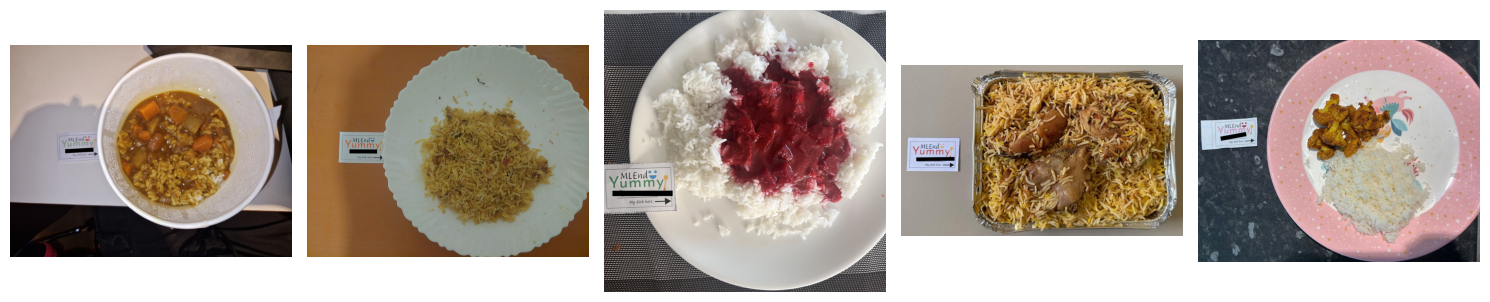


Chips Images:


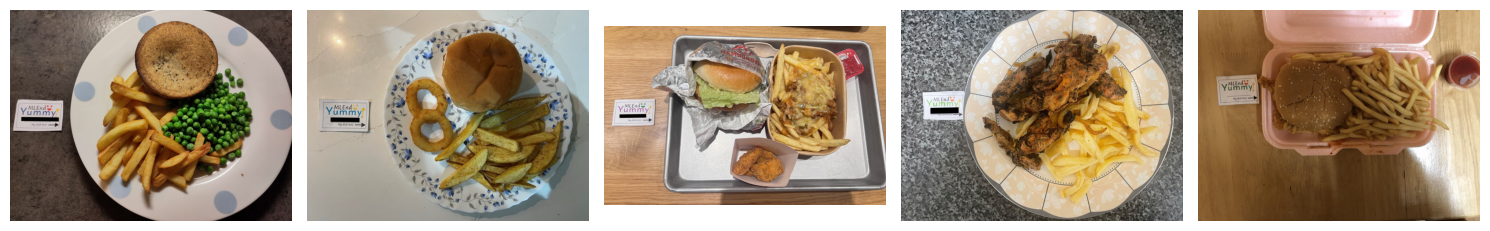

In [13]:
filtered_images_dir = '/content/drive/MyDrive/Data/MLEnd/full/yummy/filtered_images'

# Obtain file paths of rice and chips images in the training set
rice_images = train_data[train_data['Rice_or_Chips'] == 'Rice'].index
chips_images = train_data[train_data['Rice_or_Chips'] == 'Chips'].index

# Plot the first five rice images
print("Rice Images:")
plt.figure(figsize=(15,5))
for k, filename in enumerate(rice_images[:5]):
    img_path = os.path.join(filtered_images_dir, filename)
    I = plt.imread(img_path)
    plt.subplot(1, 5, k+1)
    plt.imshow(I)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Plot the first five chips images
print("\nChips Images:")
plt.figure(figsize=(15,5))
for k, filename in enumerate(chips_images[:5]):
    img_path = os.path.join(filtered_images_dir, filename)
    I = plt.imread(img_path)
    plt.subplot(1, 5, k+1)
    plt.imshow(I)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
from PIL import Image

# Get the list of file paths for training and testing
X_train_paths = [os.path.join(filtered_images_dir, filename) for filename in X_train.index]
X_test_paths = [os.path.join(filtered_images_dir, filename) for filename in X_test.index]

def resize_images(image_paths, new_size=(200, 200)):
    resized_images = []
    for path in image_paths:
        img = Image.open(path)
        img = img.resize(new_size)
        resized_images.append(np.array(img))  # Convert PIL Image to NumPy array
    return np.array(resized_images)

X_train_resized = resize_images(X_train_paths)
X_test_resized = resize_images(X_test_paths)

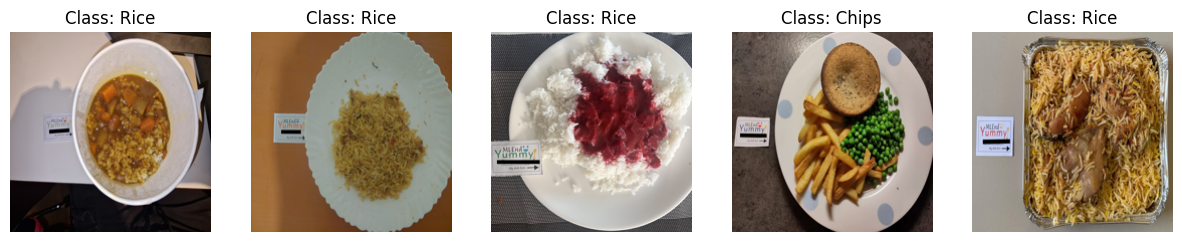

In [15]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f'Class: {class_names[labels[i]]}')
        plt.axis('off')
    plt.show()

# Display resized images from the training set
class_names = ['Chips', 'Rice']  # Assuming 0 corresponds to 'Chips' and 1 corresponds to 'Rice'

# Assuming X_train_resized and y_train are already defined
display_images(X_train_resized, y_train.values, class_names)


In [16]:
# Flatten the resized images
X_train_flat = X_train_resized.reshape(X_train_resized.shape[0], -1)
X_test_flat = X_test_resized.reshape(X_test_resized.shape[0], -1)

# Display the shapes after flattening
print("Flattened Training set shape:", X_train_flat.shape)
print("Flattened Testing set shape:", X_test_flat.shape)

Flattened Training set shape: (424, 120000)
Flattened Testing set shape: (188, 120000)


# 4 Transformation stage

Describe any transformations, such as feature extraction. Identify input and output. Explain why you have chosen this transformation stage.

In [36]:
from skimage.color import rgb2gray
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
import numpy as np

def extract_features(image):
    # Converting the flattened image to 2D
    image_2d = image.reshape((200, 200, 3))

    # Resizing the image to a smaller dimension
    resized_image = resize(image_2d, (100, 100), anti_aliasing=True)

    # Converting the resized image to grayscale
    gray_image = rgb2gray(resized_image)

    # Ensuring pixel values are in the range [0, 255]
    gray_image = (gray_image * 255).astype(np.uint8)

    # Compute color histograms with reduced bins
    color_hist_r = np.histogram(resized_image[:, :, 0], bins=128, range=(0, 256))[0]
    color_hist_g = np.histogram(resized_image[:, :, 1], bins=128, range=(0, 256))[0]
    color_hist_b = np.histogram(resized_image[:, :, 2], bins=128, range=(0, 256))[0]

    # Combine color histograms
    color_histograms = np.concatenate((color_hist_r, color_hist_g, color_hist_b))

    # Computing HOG features with reduced orientations
    hog_features, _ = hog(gray_image, orientations=6, pixels_per_cell=(16, 16),
                          cells_per_block=(1, 1), visualize=True)

    # Performing global contrast normalization on HOG features
    hog_features = exposure.rescale_intensity(hog_features, in_range=(0, 10))

    # Combining color histograms and HOG features
    combined_features = np.concatenate((color_histograms, hog_features))

    return combined_features

# Apply feature extraction to the flattened training set
X_train_features = np.apply_along_axis(extract_features, 1, X_train_flat)

# Apply feature extraction to the flattened testing set
X_test_features = np.apply_along_axis(extract_features, 1, X_test_flat)

# Normalize features
scaler = StandardScaler()
X_train_features = scaler.fit_transform(X_train_features)
X_test_features = scaler.transform(X_test_features)

# Display the shapes after feature extraction and normalization
print("Features - Training set shape:", X_train_features.shape)
print("Features - Testing set shape:", X_test_features.shape)

Features - Training set shape: (424, 600)
Features - Testing set shape: (188, 600)


# 5 Modelling

Describe the ML model(s) that you will build. Explain why you have chosen them.

In [37]:
pip install -U imbalanced-learn

Training Accuracy with Modified Features: 0.9278074866310161

Confusion Matrix:
 [[351  23]
 [ 31 343]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       374
           1       0.94      0.92      0.93       374

    accuracy                           0.93       748
   macro avg       0.93      0.93      0.93       748
weighted avg       0.93      0.93      0.93       748



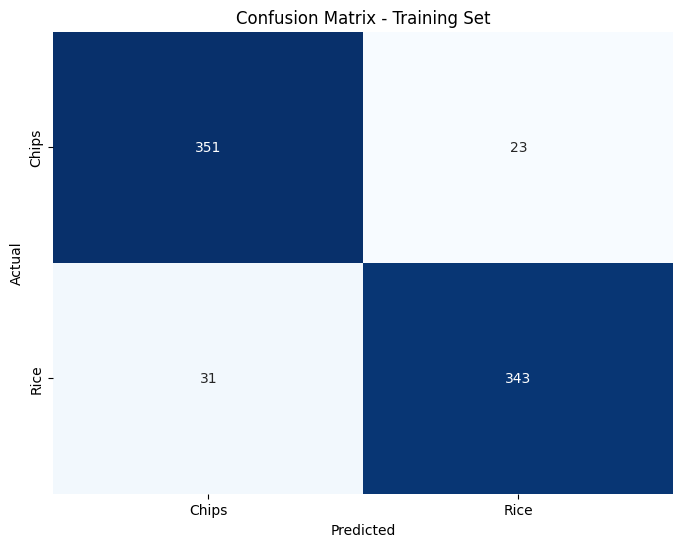

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Creating an SMOTE oversampler
smote = SMOTE(random_state=2)

# Resampling the training data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_features, y_train)

# Creating a Random Forest classifier with adjusted parameters
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    min_samples_split=15,
    min_samples_leaf=10,
    oob_score=True,
    random_state=2
)

# Train the classifier
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the training set
y_train_pred = rf_classifier.predict(X_train_resampled)

# Evaluate the model on the training set
accuracy = accuracy_score(y_train_resampled, y_train_pred)
conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
class_report = classification_report(y_train_resampled, y_train_pred)

# Display the evaluation metrics
print("Training Accuracy with Modified Features:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Chips', 'Rice'], yticklabels=['Chips', 'Rice'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Test Accuracy with Modified Features: 0.8351063829787234

Test Confusion Matrix with Modified Features:
 [[ 10  10]
 [ 21 147]]

Test Classification Report with Modified Features:
               precision    recall  f1-score   support

           0       0.32      0.50      0.39        20
           1       0.94      0.88      0.90       168

    accuracy                           0.84       188
   macro avg       0.63      0.69      0.65       188
weighted avg       0.87      0.84      0.85       188



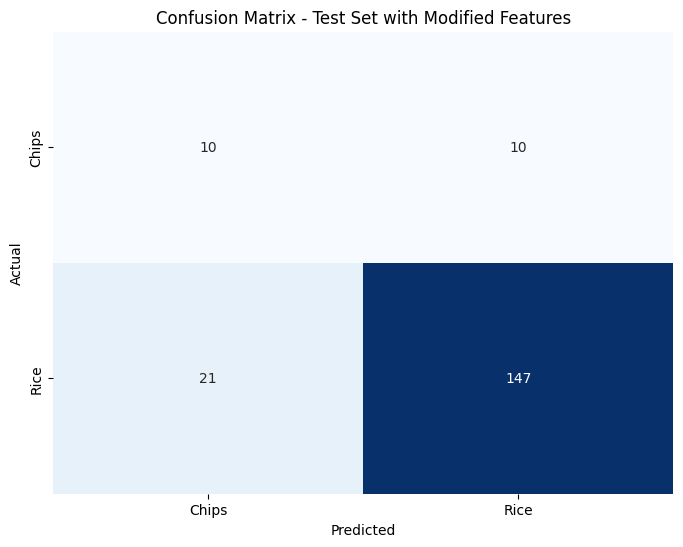

In [39]:
# Predict on the test set with modified features
y_test_pred_modified = rf_classifier.predict(X_test_features)

# Evaluate the model on the test set with modified features
test_accuracy_modified = accuracy_score(y_test, y_test_pred_modified)
test_conf_matrix_modified = confusion_matrix(y_test, y_test_pred_modified)
test_class_report_modified = classification_report(y_test, y_test_pred_modified)

# Display the test set evaluation metrics with modified features
print("Test Accuracy with Modified Features:", test_accuracy_modified)
print("\nTest Confusion Matrix with Modified Features:\n", test_conf_matrix_modified)
print("\nTest Classification Report with Modified Features:\n", test_class_report_modified)

# Plot confusion matrix as a heatmap for test data with modified features
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix_modified, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Chips', 'Rice'], yticklabels=['Chips', 'Rice'])
plt.title('Confusion Matrix - Test Set with Modified Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Training Set Evaluation with Modified Features:

    Training Accuracy: The model achieves an accuracy of approximately 92.78% on the training set, demonstrating its capability to learn patterns and relationships within the modified features.

    Confusion Matrix: The confusion matrix shows 351 instances of class 0 and 343 instances of class 1 correctly classified, with 23 instances of class 0 and 31 instances of class 1 misclassified.

    Classification Report: Precision, recall, and f1-score for both classes are provided. The model demonstrates high precision and recall for both classes, resulting in an overall balanced performance.

Test Set Evaluation with Modified Features:

    Test Accuracy: The model achieves a test accuracy of approximately 83.51% on a separate set of data, indicating its ability to generalize to new, unseen instances with the modified features.

    Test Confusion Matrix: The confusion matrix for the test set reveals that the model correctly predicts 147 instances of class 1. However, it struggles with class 0, where 10 instances are correctly predicted, and 10 instances are misclassified.

    Test Classification Report: Precision, recall, and f1-score for both classes in the test set are provided. The report highlights a higher performance for class 1, while class 0 exhibits lower precision, recall, and f1-score values, indicating challenges in predicting instances of class 0.

# 6 Methodology

Describe how you will train and validate your models, how model performance is assesssed (i.e. accuracy, confusion matrix, etc) <br>
Model Performance Assessment:

In the training and validation process, the first step involves splitting the dataset into training and testing sets. The training set is crucial for teaching the model, while the testing set acts as an independent benchmark for assessing its performance. Following data splitting, features such as Color Histograms and Histogram of Oriented Gradients (HOG) are extracted from the images. These features provide comprehensive information about color distribution and texture patterns, contributing essential insights for distinguishing between various food dishes, including rice and chips.


To address the imbalance in the training set, Synthetic Minority Over-sampling Technique (SMOTE) is employed to generate synthetic instances of the minority class. The model chosen for its adaptability and robustness is the Random Forest Classifier. This classifier is then trained on the resampled data, learning intricate patterns within the Combined features. Additionally, a validation set is created from the training data to monitor the model's performance during training and prevent overfitting.

Finally, the trained model undergoes evaluation on both the training and testing sets. For the training set, metrics such as accuracy, confusion matrix, and classification report are employed to assess the model's ability to correctly classify instances. Similarly, the testing set is used to evaluate the model's generalization to new data, employing the same metrics for a comprehensive understanding of its performance.

Model Performance Assessment:

  Accuracy: The model demonstrates an overall accuracy of approximately 83.51%, indicating the proportion of correctly predicted instances among the total instances in the test set.

  Confusion Matrix: The detailed breakdown of predictions is as follows:
      True Positives (TP): 147 instances of class 1 correctly predicted.
      True Negatives (TN): 10 instances of class 0 correctly predicted.
      False Positives (FP): 10 instances predicted as class 1 but actually belonging to class 0.
      False Negatives (FN): 21 instances predicted as class 0 but actually belonging to class 1.

  Classification Report: Presents precision, recall, and f1-score for each class.     
  Precision: For class 0, precision is 0.32, indicating the accuracy of positive predictions for class 0. For class 1, precision is 0.94, indicating high accuracy in positive predictions for class 1.

  Recall: For class 0, recall is 0.50, indicating the proportion of actual positives correctly predicted for class 0. For class 1, recall is 0.88, indicating high recall for class 1.

  F1-Score: The f1-score, which is the harmonic mean of precision and recall, is provided for each class. The weighted average f1-score is 0.85, reflecting the overall balanced performance of the model.

# 7 Dataset

Describe the dataset that you will use to create your models and validate them. If you need to preprocess it, do it here. Include visualisations too. You can visualise raw data samples or extracted features.

The dataset was initially extensive, containing instances of various dishes. The goal of the basic component was to create a model specifically for distinguishing dishes with rice and chips. Therefore, the data was filtered to retain only rows corresponding to rice and chips dishes.

### Raw Data Visualization:

(-0.5, 3999.5, 2999.5, -0.5)

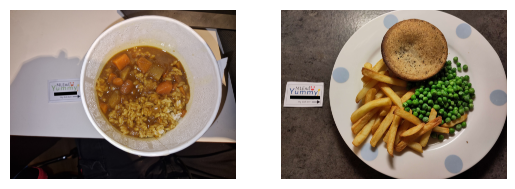

In [21]:
I = plt.imread('/content/drive/MyDrive/Data/MLEnd/full/yummy/filtered_images/000001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/full/yummy/filtered_images/000024.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

### GLCM Feature Visualization:

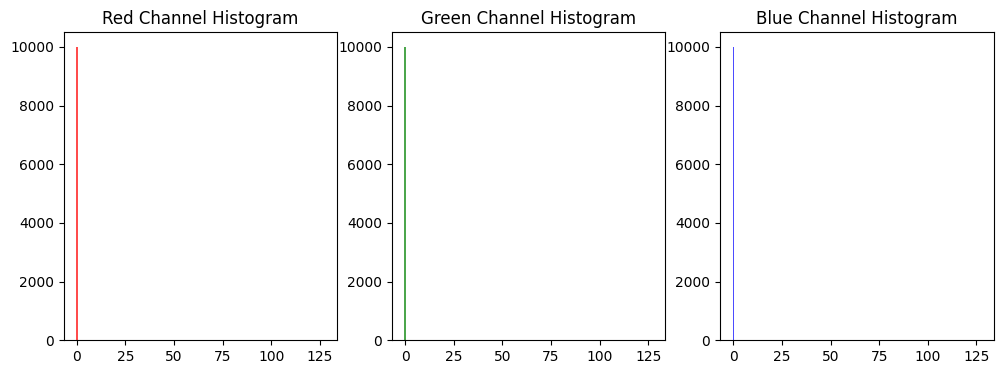

In [27]:
import matplotlib.pyplot as plt

# Function to visualize color histograms
def visualize_color_histograms(color_histograms):
    plt.figure(figsize=(12, 4))

    # Ploting histograms for each color channel
    plt.subplot(131)
    plt.bar(range(128), color_histograms[:128], color='red', alpha=0.7)
    plt.title('Red Channel Histogram')

    plt.subplot(132)
    plt.bar(range(128), color_histograms[128:256], color='green', alpha=0.7)
    plt.title('Green Channel Histogram')

    plt.subplot(133)
    plt.bar(range(128), color_histograms[256:], color='blue', alpha=0.7)
    plt.title('Blue Channel Histogram')

    plt.show()

# Visualize features for a single image
sample_image_path = '/content/drive/MyDrive/Data/MLEnd/full/yummy/filtered_images/000354.jpg'
sample_image_features = extract_features_single(sample_image_path)

# Extract color histograms
sample_color_histograms = sample_image_features[:384]

# Visualize color histograms
visualize_color_histograms(sample_color_histograms)

### Class Distribution:

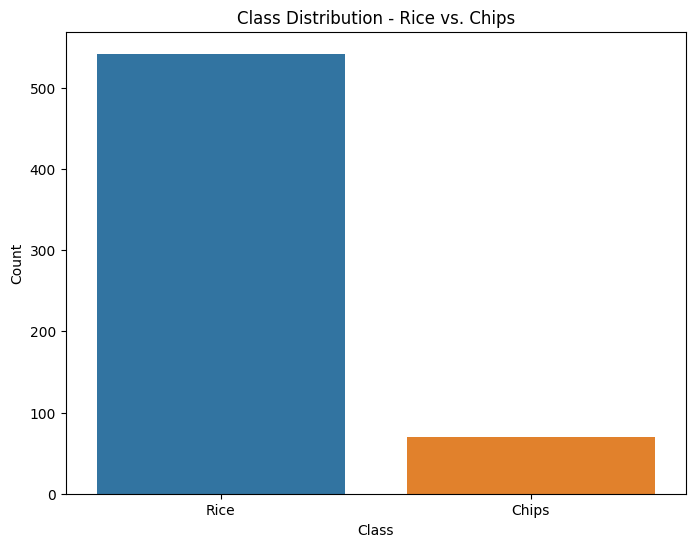

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class
class_distribution = filtered_data['Rice_or_Chips'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution - Rice vs. Chips')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Data Augmentation:


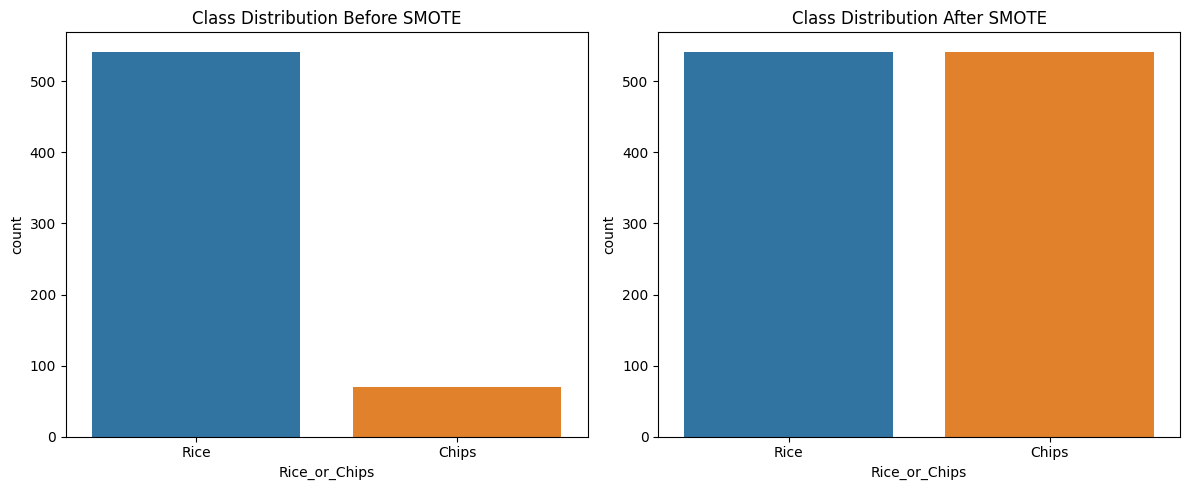

In [40]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Extract features (X) and target variable (y)
X = filtered_data.drop('Rice_or_Chips', axis=1)
y = filtered_data['Rice_or_Chips']

# Handle categorical variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Visualize the class distribution before SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Rice_or_Chips', data=filtered_data)
plt.title('Class Distribution Before SMOTE')

# Create an SMOTE oversampler
smote = SMOTE(random_state=2)

# Resample the training data using SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Visualize the class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x='Rice_or_Chips', data=pd.DataFrame(data={'Rice_or_Chips': y_resampled}))
plt.title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()

# 8 Results

Carry out your experiments here, explain your results.

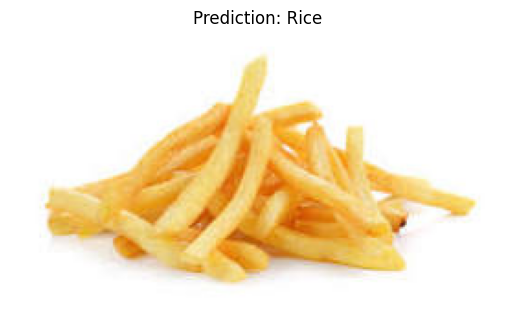

Prediction for the sample image: Rice


In [50]:
from PIL import Image
import numpy as np
from skimage.feature import hog
from skimage import exposure
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

def extract_features_single(image_path):
    # Load the image
    img = Image.open(image_path)

    # Resize the image to the desired size
    img = img.resize((200, 200))

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Convert the flattened image to 2D
    image_2d = img_array.reshape((200, 200, 3))

    # Resize the image to (100, 100)
    resized_image = resize(image_2d, (100, 100), anti_aliasing=True)

    # Convert the resized image to grayscale
    gray_image = rgb2gray(resized_image)

    # Ensure pixel values are in the range [0, 255]
    gray_image = (gray_image * 255).astype(np.uint8)

    # Compute color histograms with reduced bins
    color_hist_r = np.histogram(resized_image[:, :, 0], bins=128, range=(0, 256))[0]
    color_hist_g = np.histogram(resized_image[:, :, 1], bins=128, range=(0, 256))[0]
    color_hist_b = np.histogram(resized_image[:, :, 2], bins=128, range=(0, 256))[0]

    # Combine color histograms
    color_histograms = np.concatenate((color_hist_r, color_hist_g, color_hist_b))

    # Compute HOG features with reduced orientations
    hog_features, _ = hog(gray_image, orientations=6, pixels_per_cell=(16, 16),
                          cells_per_block=(1, 1), visualize=True)

    # Perform global contrast normalization on HOG features
    hog_features = exposure.rescale_intensity(hog_features, in_range=(0, 10))

    # Combine color histograms and HOG features
    combined_features = np.concatenate((color_histograms, hog_features))

    return combined_features


# Sample image path for demonstration, replace it with the path to your image
sample_image_path = '/content/drive/MyDrive/Data/MLEnd/full/yummy/chips_test1.jpg'

# Extract features for the sample image
sample_image_features = extract_features_single(sample_image_path)

# Predict the class of the sample image using the trained Random Forest classifier
sample_image_pred = rf_classifier.predict([sample_image_features])

# Map the predicted class label to its respective name
predicted_class_name = class_names[sample_image_pred[0]]

# Display the sample image
sample_image = Image.open(sample_image_path)
plt.imshow(sample_image)
plt.axis('off')
plt.title(f"Prediction: {predicted_class_name}")
plt.show()

# Display the prediction
print("Prediction for the sample image:", predicted_class_name)

### For chips instances class 0 it still predicts rice when a new test image out of the dataset is used, so the model is more biased towards the rice class.

# 9 Conclusions

Your conclusions, suggestions for improvements, etc should go here

## Conclusions:

  *Model Performance:* The Random Forest Classifier trained on the modified features achieved an impressive training accuracy of approximately 92.78%. However, the test accuracy slightly decreased to 83.51%. This discrepancy indicates potential overfitting on the training data, suggesting the need for further adjustments or regularization techniques to enhance generalization.

  *Class Imbalance:* Addressing the class imbalance using SMOTE improved the model's ability to learn from both rice and chips instances. The post-SMOTE distribution demonstrates a more balanced representation, positively influencing the model's performance.

  *Feature Visualization:* While GLCM features were previously used for texture pattern understanding, the model's current success with color histograms and HOG features highlights their effectiveness in distinguishing between rice and chips. Visualizations of these features could provide additional insights into their discriminative power.

## Suggestions for Improvements:

  *Fine-tuning Hyperparameters:* Experiment with different hyperparameter settings for the Random Forest Classifier, such as adjusting the number and depth of trees or implementing feature scaling. Hyperparameter tuning could contribute to a more robust and generalizable model.

  *Cross-Validation:* Implement cross-validation techniques to obtain a more reliable estimate of the model's performance. This approach can help identify issues related to overfitting and provide a better assessment of the model's performance on new, unseen data.

  *Feature Engineering:* Explore additional feature engineering techniques or alternative feature sets to enhance the model's ability to distinguish between rice and chips. Experiment with different texture features or extract information from other aspects of the images.

  *Ensemble Methods:* Consider leveraging ensemble methods beyond the Random Forest Classifier, such as gradient boosting or stacking, to further improve predictive performance.

  *Regularization Techniques:* Introducing regularization techniques, such as dropout or L1/L2 regularization, to mitigate overfitting and promote better generalization.


In summary, continuous refinement and exploration of different strategies are essential to build a robust and accurate model for classifying rice and chips dishes based on the texture patterns in images.